In [32]:
%pip install numpy
%pip install pandas
%pip install seaborn
%pip install plotly-express
%pip install jinja2
%pip install matplotlib
%pip install geopy
%pip install nbformat



Note: you may need to restart the kernel to use updated packages.
^C
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.


<h2 style="background-color:#E1F8FF; margin-bottom:0px;padding:20px; color:#000; border:5px solid #4AD3FF"> Table of Contents</h2>

1. [Import necessary Libaries](#imports)
2. [Read the Dataset](#dataset)<br>
    2.1. [Dataset Description](#dataset_des)
3. [Data Exploration](#data_expo)
4. [Feature Enginnering](#feat_eng)
5. [Data Cleaning](#data_clean)
6. [Data Analysis](#data_ana)<br>
    6.1. [Visualize the number Layoffs in these Years](#v1)<br>
    6.2. [Get the insights of the Layoffs groupby to their Continents](#insi1)<br>
    6.3. [Lets, visualize these countries](#v2)<br>
    6.4. [Get the insights of the company with 100% layoff rate](#insi2)<br>
    6.5. [Visualize the locations of tthe companies with 100% layoff rate](#geoloc)<br>
    6.6. [Divide the dataframe into 4 Groups](#divide_4grp)<br>
    6.6.1 [Visualize the different types of Industries in the Group 4](#v3)<br>
    6.6.2 [Lets, see the Top 10 companies with the most layoffs in the group 4 (154-11000 layoff count)](#insi3)<br>
    6.6.2a [Visualize the Top10 Layoff Count and Location](#v4)<br>
    6.6.2b [Visualize the Top16 Companies Location](#v5)<br>
    6.6.2c [Visualize the Top10 Layoff Companies Funds Raised](#v6)<br>
7. [Conclusion](#conclusion)

<a id="imports"></a>
<h2 style="background-color:#E1F8FF; margin-bottom:0px;padding:20px; color:#000; border-bottom:5px solid #4AD3FF">1. Import necessary Libaries</h2>

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly_express as px

import seaborn as sns

palette = sns.color_palette("rainbow", 8)

<a id="dataset"></a>
<h2 style="background-color:#E1F8FF; margin-bottom:0px;padding:20px; color:#000; border-bottom:5px solid #4AD3FF">2. Read the Dataset</h2>

In [3]:
df = pd.read_csv("../dataset/layoffs_data.csv")
df.head().style.set_properties(**{'background-color': '#E1F8FF','color': '#000','border': '1px solid #4AD3FF'})

,Company,Location_HQ,Industry,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,Laid_Off_Count,List_of_Employees_Laid_Off
0,Fisker,Los Angeles,Transportation,0.150000,2024-02-29,https://techcrunch.com/2024/02/29/fisker-layoffs-cash-going-concern-dealerships/,1700.000000,Post-IPO,2024-02-29 23:35:20,United States,nan,Unknown
1,Electronic Arts,SF Bay Area,Consumer,0.050000,2024-02-28,https://www.cnbc.com/2024/02/28/ea-layoffs-company-to-cut-5percent-of-workforce-or-about-670-employees.html,2.000000,Post-IPO,2024-02-29 00:45:00,United States,670.000000,Unknown
2,Vacasa,Portland,Travel,0.050000,2024-02-28,https://www.oregonlive.com/business/2024/02/portland-based-vacasa-will-lay-off-another-320-new-year-is-off-to-a-difficult-start.html,834.000000,Post-IPO,2024-02-29 17:22:37,United States,320.000000,Unknown
3,Treasury Prime,SF Bay Area,Finance,0.400000,2024-02-28,https://www.bankingdive.com/news/treasury-prime-lay-off-40-50-employees-marketing-liaison-direct-fintech-partner-chris-dean/708770/,71.000000,Series C,2024-02-29 00:48:03,United States,40.000000,Unknown
4,Motional,Boston,Transportation,0.050000,2024-02-28,https://techcrunch.com/2024/02/28/hyundai-backed-autonomous-company-motional-cuts-5-of-workforce/,nan,Unknown,2024-02-28 18:50:58,United States,nan,Unknown


<a id="dataset_des"></a>
<h3 style="background-color:#E1F8FF; margin-bottom:0px;padding:10px; color:#000">2.1 Dataset Description</h3>

1. Company - Name of the Company
2. Location - Location of the Company
3. Industry - Type of Industry the company is
4. Laid_Off_Count - Total count
5. Percentage - Percentage of layoff
6. Date - Date of layoff
7. Source - Data gathered from source
8. Funds_Raised - Total funds raised
9. Stage - Stage of the company
10. Date_Added - data added in database
11. Country - Country of company located
12. List_of_Employees_Laid_Off - link to g_docs of employee list

In [4]:
df.shape

(3485, 12)

<a id="data_expo"></a>
<h2 style="background-color:#E1F8FF; margin-bottom:0px;padding:20px; color:#000; border-bottom:5px solid #4AD3FF">3. Data Exploration</h2>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3485 entries, 0 to 3484
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company                     3485 non-null   object 
 1   Location_HQ                 3485 non-null   object 
 2   Industry                    3485 non-null   object 
 3   Percentage                  2245 non-null   float64
 4   Date                        3485 non-null   object 
 5   Source                      3485 non-null   object 
 6   Funds_Raised                3115 non-null   float64
 7   Stage                       3485 non-null   object 
 8   Date_Added                  3485 non-null   object 
 9   Country                     3485 non-null   object 
 10  Laid_Off_Count              2290 non-null   float64
 11  List_of_Employees_Laid_Off  3484 non-null   object 
dtypes: float64(3), object(9)
memory usage: 326.8+ KB


In [6]:
df.isna().sum()

Company                          0
Location_HQ                      0
Industry                         0
Percentage                    1240
Date                             0
Source                           0
Funds_Raised                   370
Stage                            0
Date_Added                       0
Country                          0
Laid_Off_Count                1195
List_of_Employees_Laid_Off       1
dtype: int64

In [7]:
df.shape

(3485, 12)

In [8]:
df.describe()

,Percentage,Funds_Raised,Laid_Off_Count
count,2245.000000,3115.000000,2290.000000
mean,0.278106,776.946387,250.860699
std,0.283833,4800.136787,780.128866
min,0.000000,0.000000,3.000000
25%,0.100000,51.000000,40.000000
50%,0.170000,165.000000,80.000000
75%,0.300000,462.000000,185.750000
max,1.000000,121900.000000,12000.000000


<a id="feat_eng"></a>
<h2 style="background-color:#E1F8FF; margin-bottom:0px;padding:20px; color:#000; border-bottom:5px solid #4AD3FF">4. Feature Engineering</h2>

Now, lets create a new column named 'year_of_laidoff' which will tell us on which layoff happend

In [9]:
def get_date():
    year_list = []
    
    col = df['Date_Added']
    for i in range(len(col)):
        date = col[i]
        year = col[i].split("-", 1)[0]
        year_list.append(year)
        # break
    return year_list

layoff_year_list = get_date()

In [10]:
df['year_of_laidOff'] = layoff_year_list

<a id="data_clean"></a>
<h2 style="background-color:#E1F8FF; margin-bottom:0px;padding:20px; color:#000; border-bottom:5px solid #4AD3FF">5. Data Cleaning</h2>

<br>
Lets, with some cleanup...<br>
We don't need the Source(data gathered from source), Date_Added(data added in database), and List_of_Employees_Laid_Off - link to g_docs of employee list

In [11]:
df.drop(['Source', 'Date_Added', 'List_of_Employees_Laid_Off'], axis=1, inplace=True)

<br>Drop the rows which Layoff count NAN, we don't need those rows

In [12]:
df = df[df['Laid_Off_Count'].notna()]

In [13]:
df.head()

,Company,Location_HQ,Industry,Percentage,Date,Funds_Raised,Stage,Country,Laid_Off_Count,year_of_laidOff
1,Electronic Arts,SF Bay Area,Consumer,0.05,2024-02-28,2.0,Post-IPO,United States,670.0,2024
2,Vacasa,Portland,Travel,0.05,2024-02-28,834.0,Post-IPO,United States,320.0,2024
3,Treasury Prime,SF Bay Area,Finance,0.40,2024-02-28,71.0,Series C,United States,40.0,2024
5,Sony Interactive,SF Bay Area,Consumer,0.08,2024-02-27,NaN,Subsidiary,United States,900.0,2024
6,Bumble,Austin,Consumer,0.30,2024-02-27,313.0,Post-IPO,United States,350.0,2024


<a id="data_ana"></a>
<h2 style="background-color:#E1F8FF; margin-bottom:0px;padding:20px; color:#000; border-bottom:5px solid #4AD3FF">6. Data Analytics</h2>

<a id="v1"></a>
<h3 style="background-color:#E1F8FF; margin-bottom:0px;padding:10px; color:#000">6.1. Visualize the number Layoffs in these Years</h3>

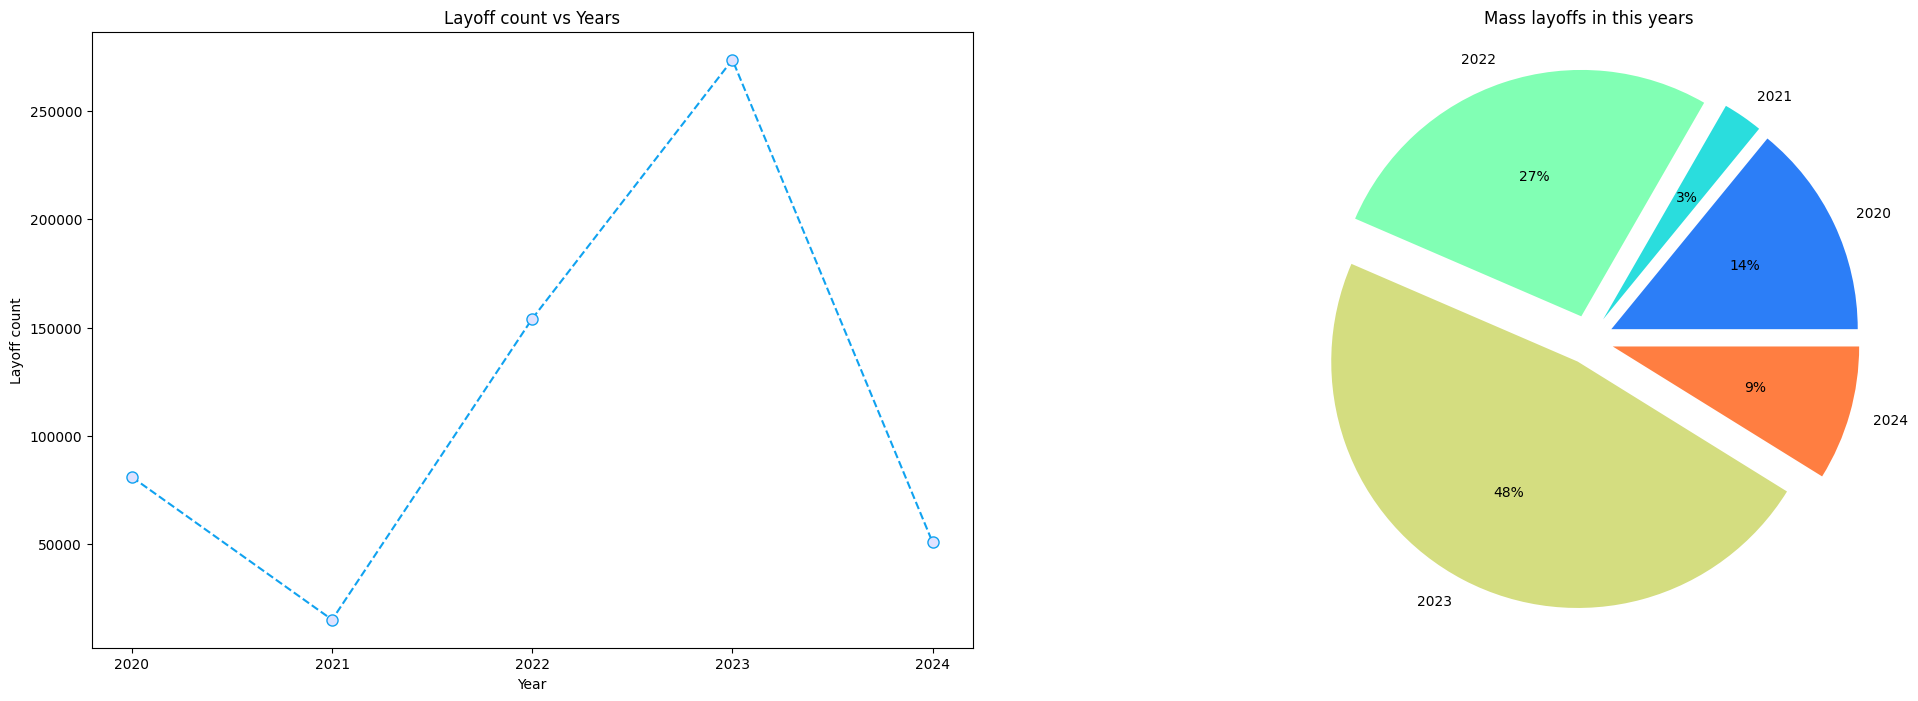

In [14]:
plt.figure(figsize=(25, 8))
laidOff_countYear = df.groupby('year_of_laidOff', as_index=False).sum()

plt.subplot(1, 2, 1)

plt.plot(laidOff_countYear['year_of_laidOff'], laidOff_countYear['Laid_Off_Count'], marker="o", linestyle='--', color='#10a2f0', 
         markerfacecolor='#dfe2ff', markersize=8)
plt.xlabel('Year')
plt.ylabel('Layoff count')
plt.title("Layoff count vs Years")

plt.subplot(1, 2, 2)

explode = [0.1] * len(laidOff_countYear)  # Explode all slices
palette = sns.color_palette("rainbow", len(laidOff_countYear))

plt.pie(x=laidOff_countYear['Laid_Off_Count'], labels=laidOff_countYear['year_of_laidOff'], autopct='%.f%%',
        explode=explode, colors=palette)
plt.title("Mass layoffs in this years")

plt.show()

<a id="insi1"></a>
<h3 style="background-color:#E1F8FF; margin-bottom:0px;padding:10px; color:#000">6.2. Get the insights of the layoffs groupby to their Continents</h3>

In [15]:
laidOff_countByCountry = df.groupby('Country', as_index=False).sum()

In [16]:
asia = ['China', 'Hong Kong', 'India', 'Indonesia', 'Malaysia', 'Myanmar', 'Singapore', 'Thailand', 'United Arab Emirates', 'Israel']
europe = ['Austria', 'Bulgaria','Denmark', 'Finland', 'France', 'Germany', 'Ireland', 'Lithuania', 'Luxembourg', 'Norway', 
          'Poland', 'Portugal', 'Romania', 'Russia', 'Sweden', 'Switzerland', 'Netherlands', 'United Kingdom']

n_america = ['Canada', 'Mexico', 'United States']
s_america = ['Argentina', 'Brazil', 'Chile', 'Colombia']

africa = ['Estonia', 'Kenya', 'Nigeria', 'Senegal', 'Seychelles']
oceania = ['Australia', 'New Zealand']

In [17]:
asia_insight = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(asia)]
europe_insight = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(europe)]

nAmerica_insight = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(n_america)]
sAmerica_insight = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(s_america)]

africa_insight = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(africa)]
oceania_insight = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(oceania)]

C:\Users\oknor\AppData\Local\Temp\ipykernel_11544\3713870287.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=asia_insight, y=asia_insight['Laid_Off_Count'], x=asia_insight['Country'], palette=palette)
C:\Users\oknor\AppData\Local\Temp\ipykernel_11544\3713870287.py:4: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=asia_insight, y=asia_insight['Laid_Off_Count'], x=asia_insight['Country'], palette=palette)
C:\Users\oknor\AppData\Local\Temp\ipykernel_11544\3713870287.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=europe_insight, y=europe_insight['Laid_Off_Count'], x=europe_in

C:\Users\oknor\AppData\Local\Temp\ipykernel_11544\3713870287.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=nAmerica_insight, y=nAmerica_insight['Laid_Off_Count'], x=nAmerica_insight['Country'], palette=palette)
C:\Users\oknor\AppData\Local\Temp\ipykernel_11544\3713870287.py:16: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(data=nAmerica_insight, y=nAmerica_insight['Laid_Off_Count'], x=nAmerica_insight['Country'], palette=palette)
C:\Users\oknor\AppData\Local\Temp\ipykernel_11544\3713870287.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sAmerica_insight, y=sAmerica_insight['Laid_Off_Count'], x=sAmerica_insi

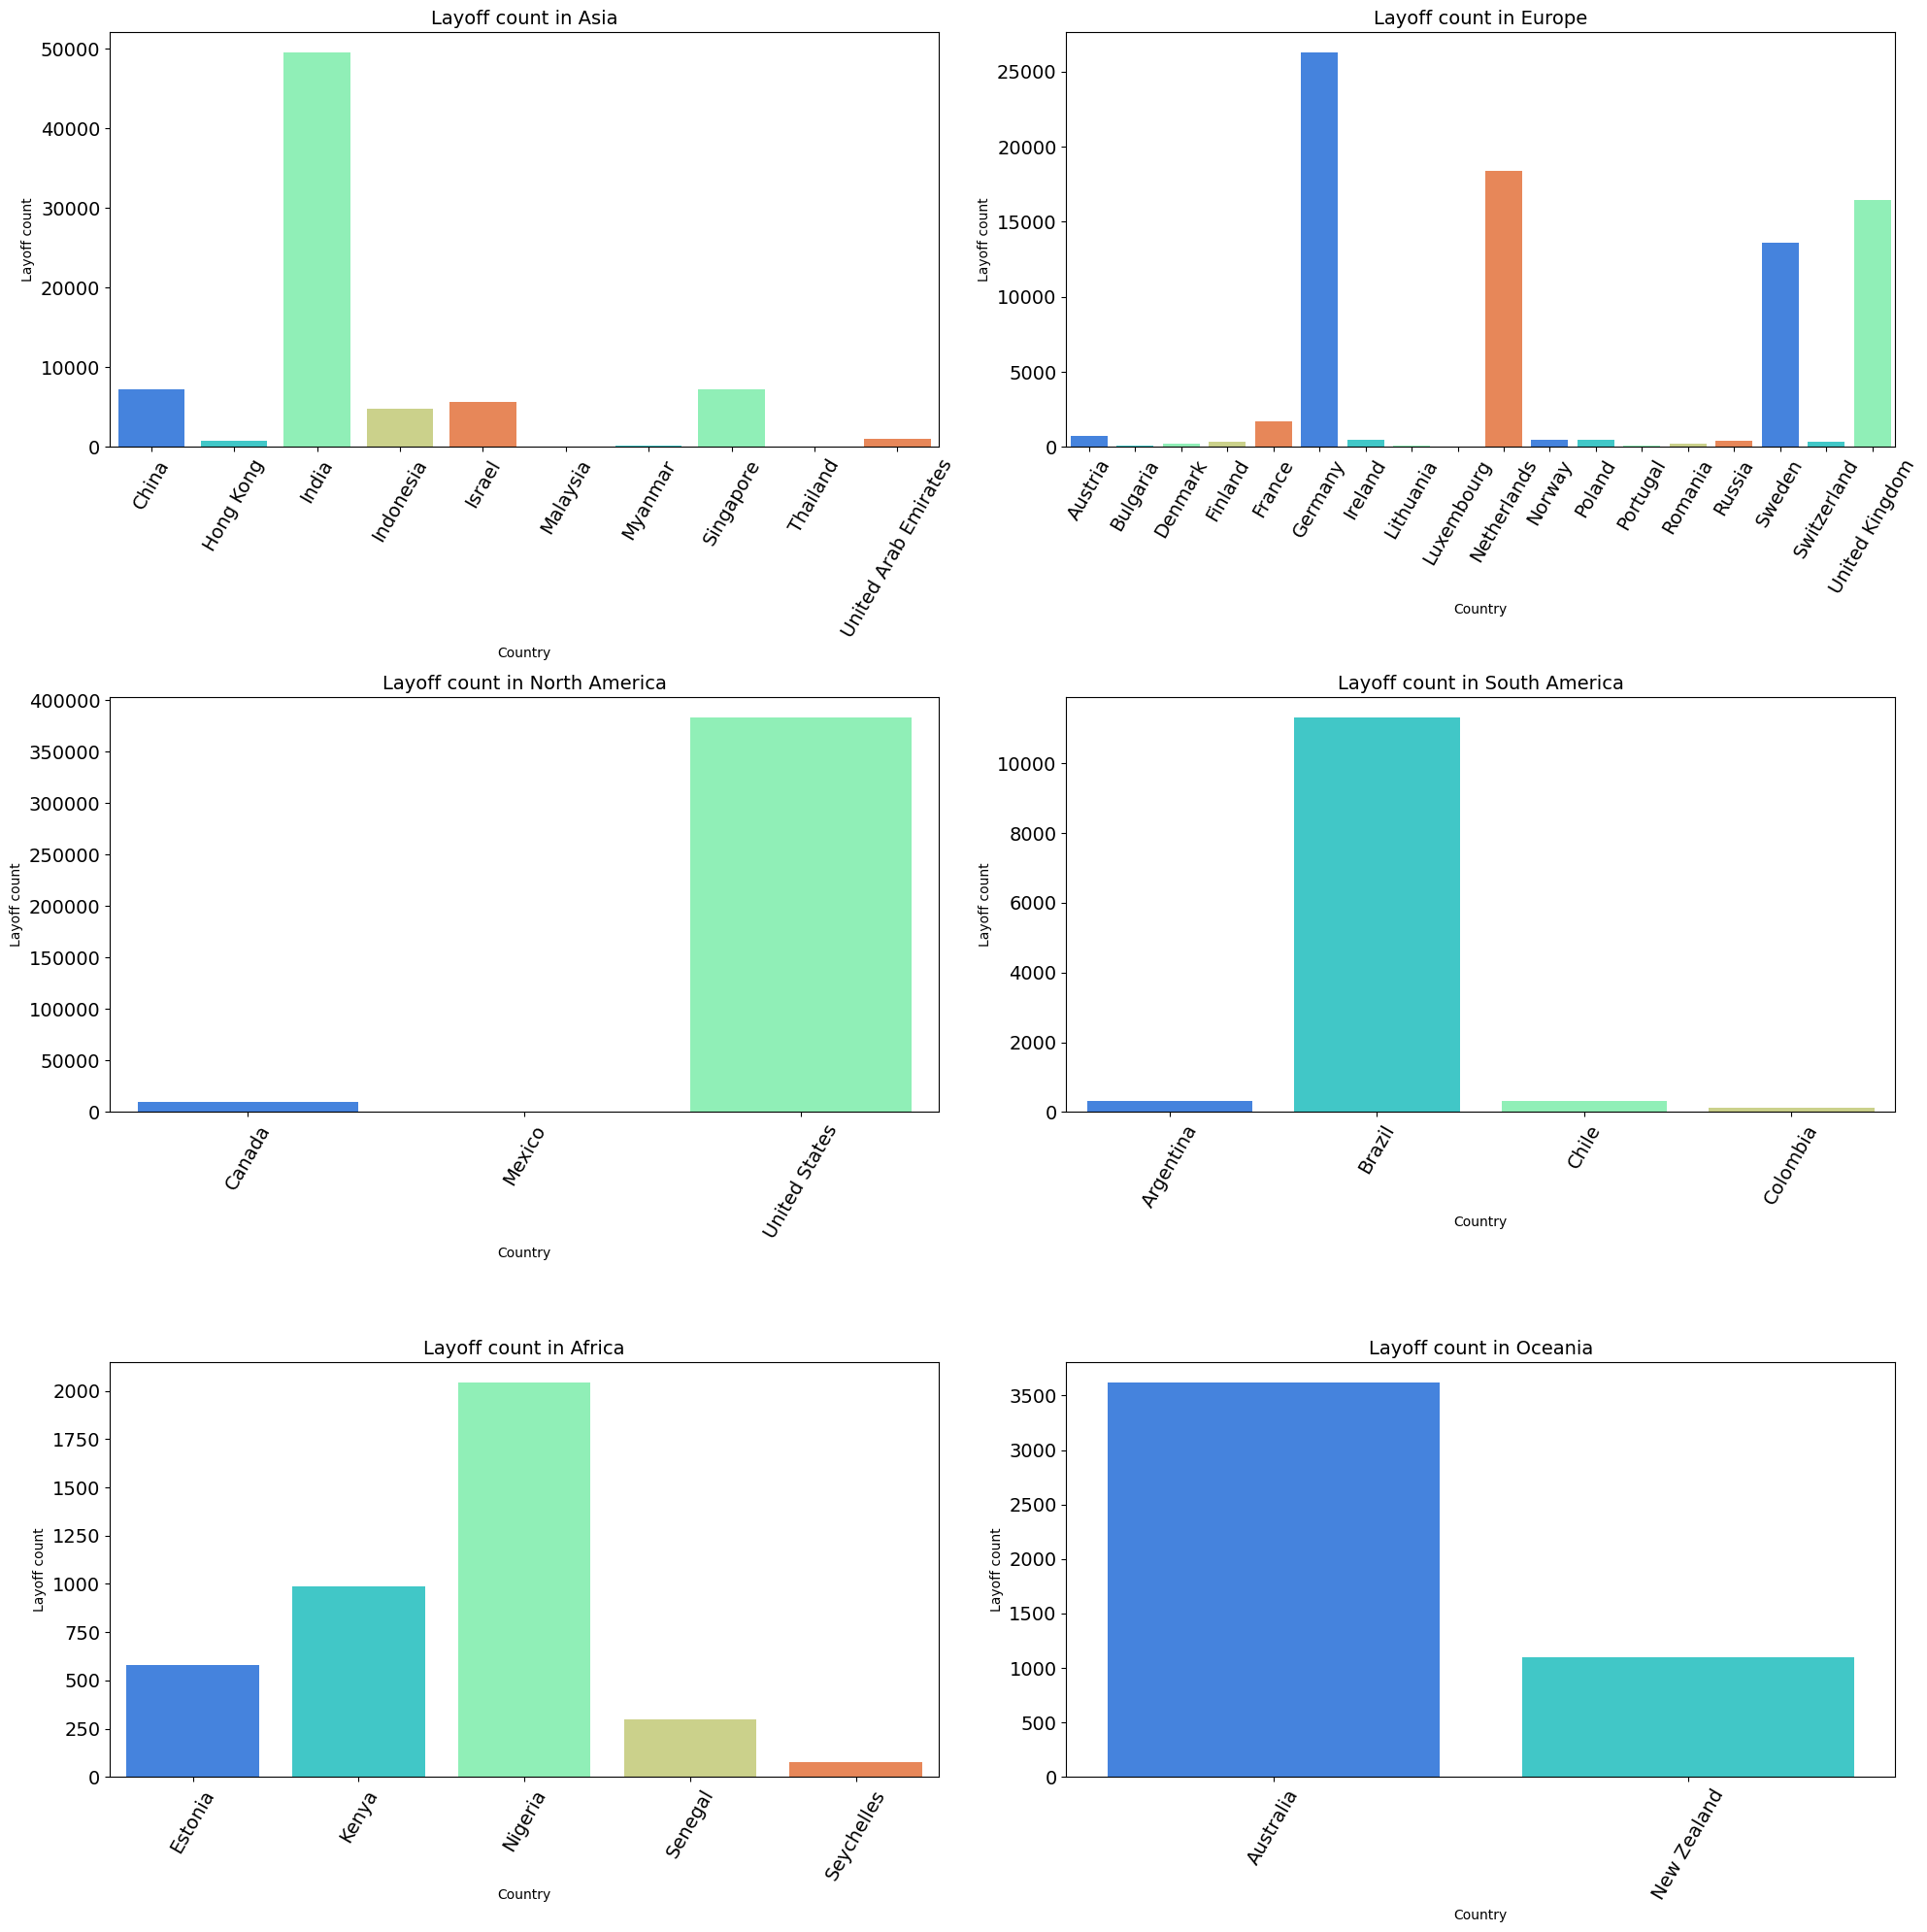

In [18]:
plt.figure(figsize=(20, 20))

plt.subplot(3, 2, 1)
sns.barplot(data=asia_insight, y=asia_insight['Laid_Off_Count'], x=asia_insight['Country'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('Country'), plt.ylabel('Layoff count')
plt.title("Layoff count in Asia", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)

plt.subplot(3, 2, 2)
sns.barplot(data=europe_insight, y=europe_insight['Laid_Off_Count'], x=europe_insight['Country'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('Country'), plt.ylabel('Layoff count')
plt.title("Layoff count in Europe", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)

plt.subplot(3, 2, 3)
sns.barplot(data=nAmerica_insight, y=nAmerica_insight['Laid_Off_Count'], x=nAmerica_insight['Country'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('Country'), plt.ylabel('Layoff count')
plt.title("Layoff count in North America", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)

plt.subplot(3, 2, 4)
sns.barplot(data=sAmerica_insight, y=sAmerica_insight['Laid_Off_Count'], x=sAmerica_insight['Country'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('Country'), plt.ylabel('Layoff count')
plt.title("Layoff count in South America", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)

plt.subplot(3, 2, 5)
sns.barplot(data=africa_insight, y=africa_insight['Laid_Off_Count'], x=africa_insight['Country'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('Country'), plt.ylabel('Layoff count')
plt.title("Layoff count in Africa", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)

plt.subplot(3, 2, 6)
sns.barplot(data=oceania_insight, y=oceania_insight['Laid_Off_Count'], x=oceania_insight['Country'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('Country'), plt.ylabel('Layoff count')
plt.title("Layoff count in Oceania", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()

so, from the above visualization we can see that ***India, Germany, Netherlands, Sweden, United Kingdom, United States, Nigeria, and Australia*** are the countries to get most of the layoffs


<a id="v2"></a>
<h2 style="background-color:#E1F8FF; margin-bottom:0px;padding:20px; color:#000; border-bottom:5px solid #4AD3FF">6.3. Lets, visualize these countries</h2>

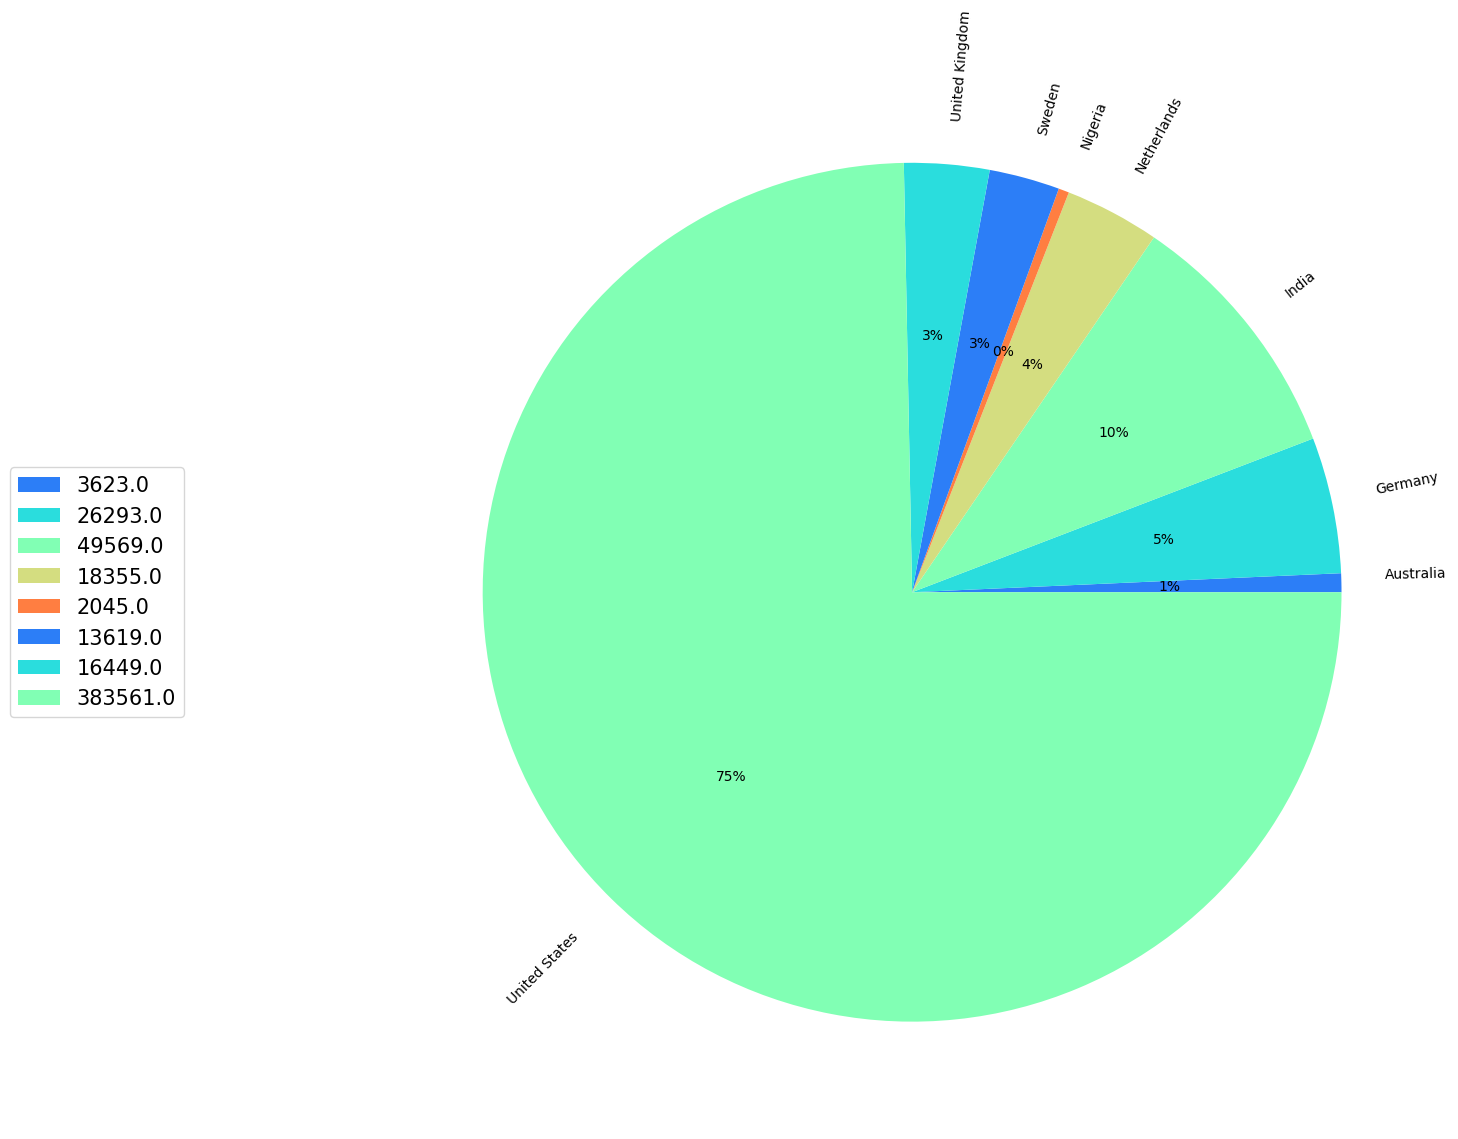

In [19]:
mass_layoff_countries_list = ['India', 'Germany', 'Netherlands', 'Sweden', 'United Kingdom', 'United States', 'Nigeria', 'Australia']

mass_layoff_countries = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(mass_layoff_countries_list)]

plt.figure(figsize=(15, 20))
plt.pie(data=mass_layoff_countries, x=mass_layoff_countries['Laid_Off_Count'], labels=mass_layoff_countries['Country'],
        autopct='%.f%%', colors=palette, rotatelabels=True, wedgeprops = {'linewidth': 3})
plt.legend(mass_layoff_countries['Laid_Off_Count'], loc='center left', bbox_to_anchor=(-0.35, .5), fontsize=15)
plt.xticks(fontsize=50), plt.yticks(fontsize=50)
plt.tight_layout()
plt.show()

<a id="insi2"></a>
<h2 style="background-color:#E1F8FF; margin-bottom:0px;padding:20px; color:#000; border-bottom:5px solid #4AD3FF">6.4. Get the insights of the company with <strong>100% layoff rate</strong> </h2>

In [20]:
insight_1 = df.loc[df['Percentage'] == 1.00].dropna()
insight_1.head()

,Company,Location_HQ,Industry,Percentage,Date,Funds_Raised,Stage,Country,Laid_Off_Count,year_of_laidOff
56,Drizly,Boston,Retail,1.0,2024-02-05,119.0,Acquired,United States,168.0,2024
193,Frontdesk,Milwaukee,Travel,1.0,2024-01-02,26.0,Unknown,United States,200.0,2024
232,Zulily,Seattle,Retail,1.0,2023-12-08,194.0,Acquired,United States,839.0,2023
239,ZestMoney,Bengaluru,Finance,1.0,2023-12-05,120.0,Series C,India,150.0,2023
345,Convoy,Seattle,Logistics,1.0,2023-10-19,1100.0,Series E,United States,500.0,2023


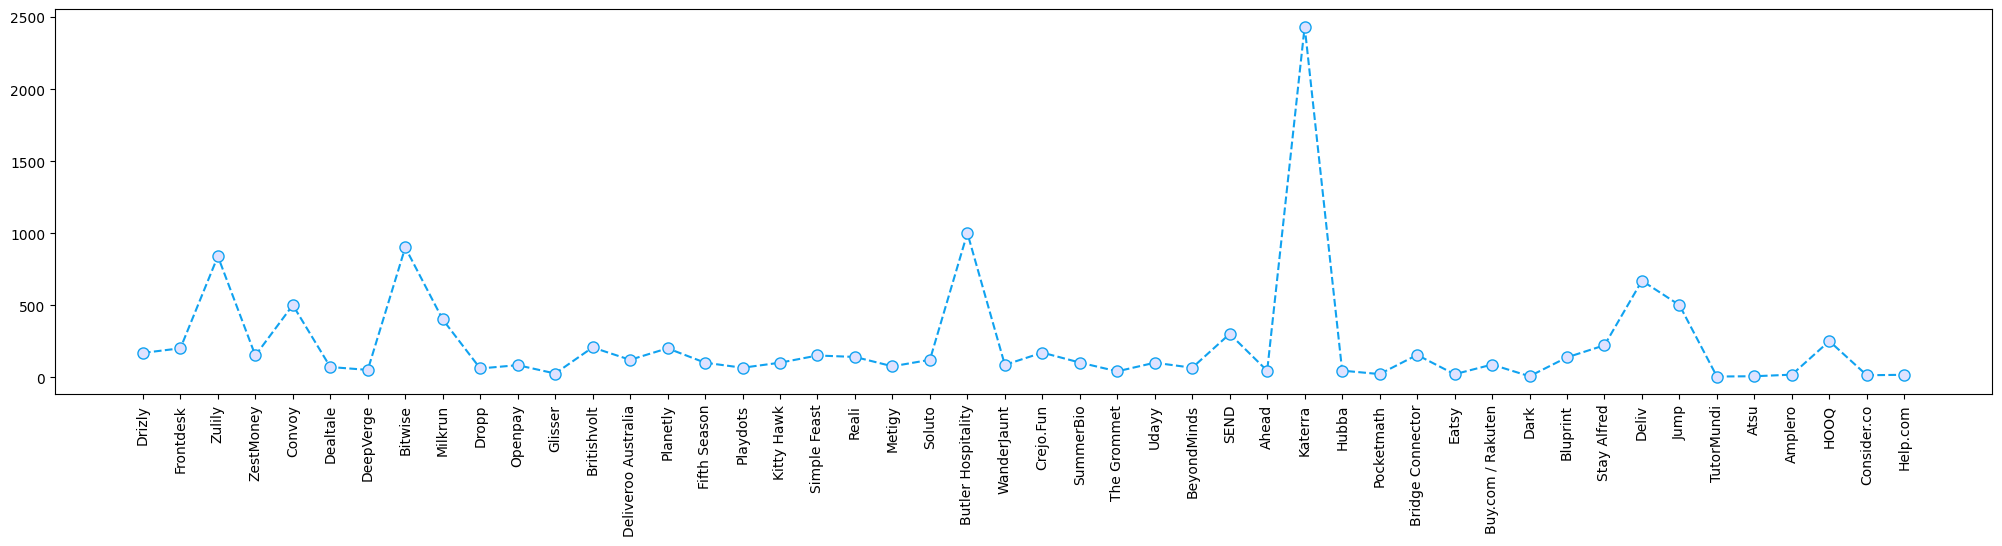

In [21]:
plt.figure(figsize=(25,5))

plt.plot(insight_1['Company'], insight_1['Laid_Off_Count'], marker="o", linestyle='--', color='#10a2f0', 
         markerfacecolor='#dfe2ff', markersize=8)
plt.xticks(rotation = 90)

plt.show()

<a id="divide_4grp"></a>
<h2 style="background-color:#E1F8FF; margin-bottom:0px; padding:20px; color:#000; border-bottom:5px solid #4AD3FF">6.6. Divide the dataframe into <strong>4 Groups</strong></h2>
So, we can divide the data into <strong>4 groups</strong> according to their <strong>Layoff count</strong> from 3-35, 35-73, 73-154, and 154-11000

In [23]:
grp1_insight = df.loc[(df['Laid_Off_Count'] <= 35)]
grp2_insight = df.loc[(df['Laid_Off_Count'] > 35) & (df['Laid_Off_Count'] <= 73)]
grp3_insight = df.loc[(df['Laid_Off_Count'] > 75) & (df['Laid_Off_Count'] <= 153)]
grp4_insight = df.loc[(df['Laid_Off_Count'] > 153)]

<a id="v3"></a>
<h4 style="background-color:#efefef; margin-bottom:0px;padding:10px; color:#000">6.6.1 Visualize the different types of Industries in the Group 4</h4>

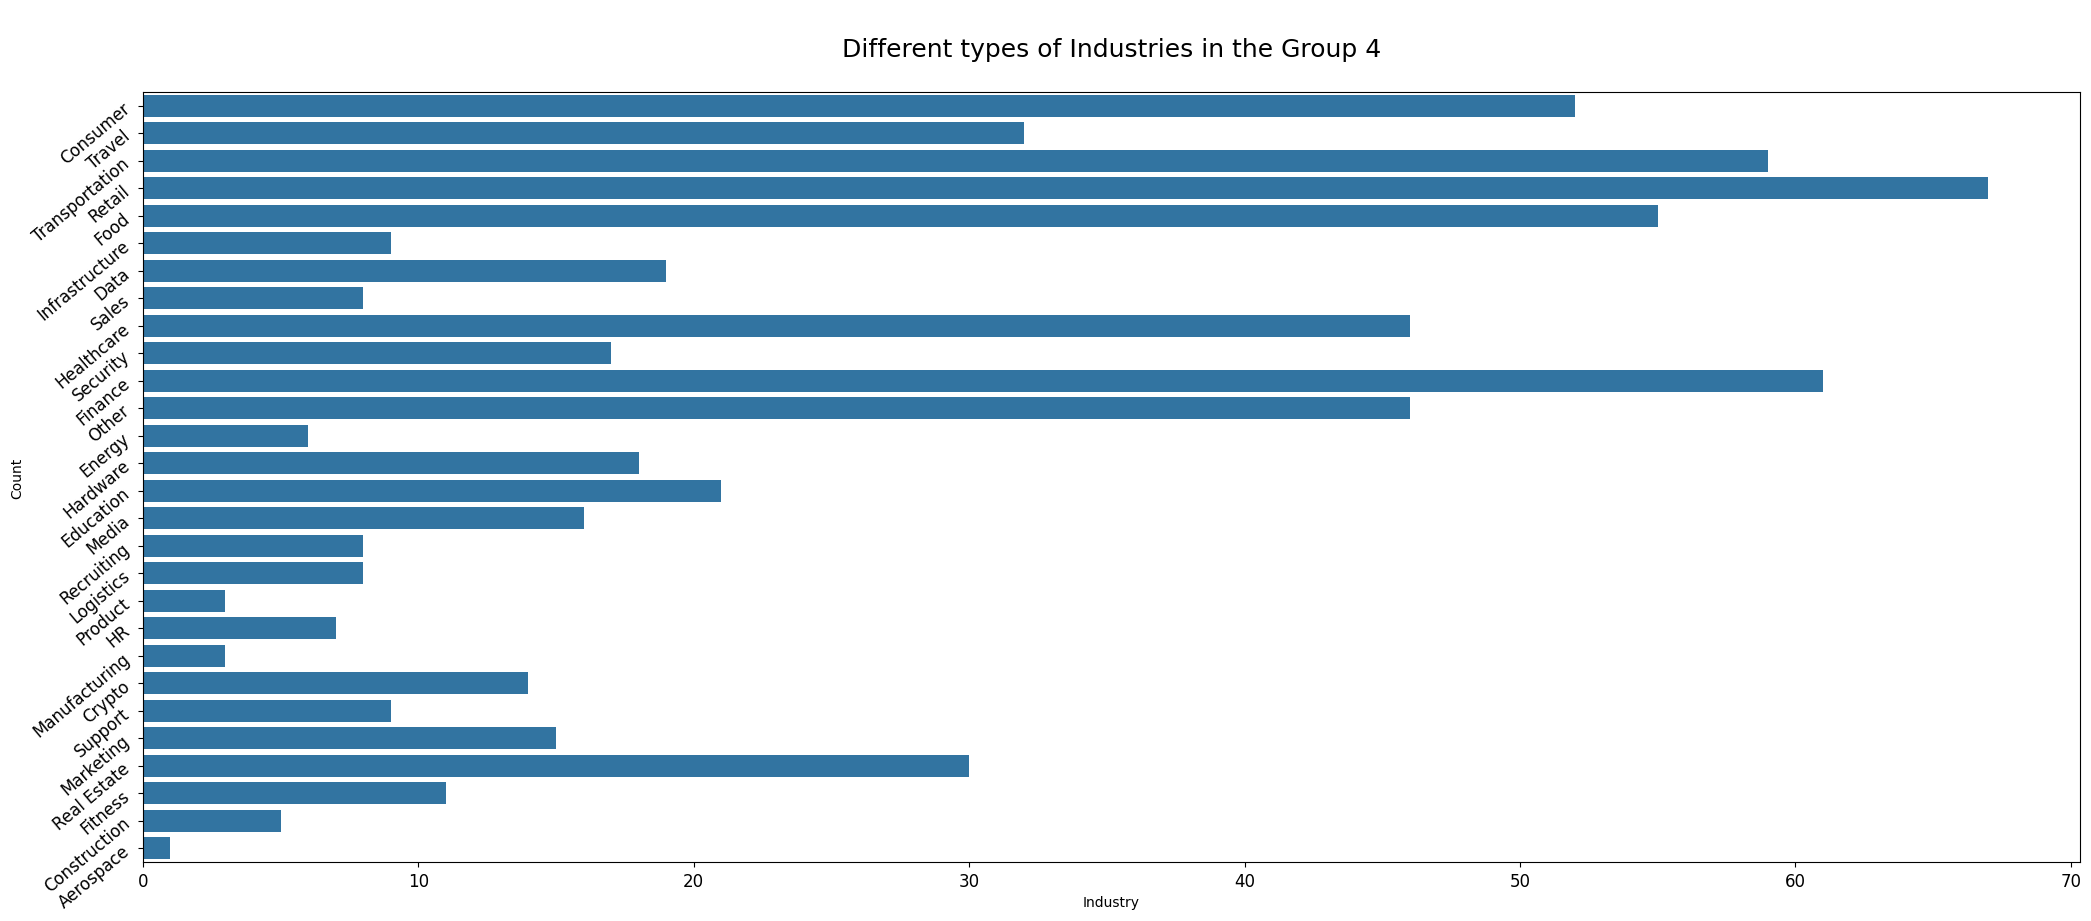

In [24]:
plt.figure(figsize=(25,10))

sns.countplot(y='Industry', data=grp4_insight)
plt.xlabel('Industry'), plt.ylabel('Count')
plt.xticks(fontsize=12), plt.yticks(rotation=40, fontsize=12)
plt.title("\nDifferent types of Industries in the Group 4\n", fontsize=18)

plt.show()

<a id="insi3"></a>
<h4 style="background-color:#efefef; margin-bottom:0px;padding:10px; color:#000">6.6.2 Lets, see the <strong>Top 10</strong> companies with the most layoffs in the group 4 (154-11000 layoff count)</h4>

In [25]:
top10_comp = grp4_insight.sort_values('Laid_Off_Count', ascending=False)
top10_comp = top10_comp.head(10)
top10_comp

,Company,Location_HQ,Industry,Percentage,Date,Funds_Raised,Stage,Country,Laid_Off_Count,year_of_laidOff
1386,Google,SF Bay Area,Consumer,0.06,2023-01-20,26.0,Post-IPO,United States,12000.0,2023
1870,Meta,SF Bay Area,Consumer,0.13,2022-11-09,26000.0,Post-IPO,United States,11000.0,2022
1419,Microsoft,Seattle,Other,0.05,2023-01-18,1.0,Post-IPO,United States,10000.0,2023
1061,Meta,SF Bay Area,Consumer,NaN,2023-03-14,26000.0,Post-IPO,United States,10000.0,2023
1802,Amazon,Seattle,Retail,0.03,2022-11-16,108.0,Post-IPO,United States,10000.0,2022
1044,Amazon,Seattle,Retail,NaN,2023-03-20,108.0,Post-IPO,United States,9000.0,2023
1131,Ericsson,Stockholm,Other,0.08,2023-02-24,663.0,Post-IPO,Sweden,8500.0,2023
1562,Salesforce,SF Bay Area,Sales,0.10,2023-01-04,65.0,Post-IPO,United States,8000.0,2023
109,SAP,Walldorf,Other,0.07,2024-01-23,1300.0,Post-IPO,Germany,8000.0,2024
1561,Amazon,Seattle,Retail,0.02,2023-01-04,108.0,Post-IPO,United States,8000.0,2023


<a id="v4"></a>
<h5 style="background-color:#efefef; margin-bottom:0px;padding:10px; color:#000">6.6.2a Visualize the Top10 <strong>Layoff Count and Location</strong></h5>

C:\Users\oknor\AppData\Local\Temp\ipykernel_11544\4088264745.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_comp, x=top10_comp['Company'], y=top10_comp['Laid_Off_Count'], palette=palette)
C:\Users\oknor\AppData\Local\Temp\ipykernel_11544\4088264745.py:4: UserWarning: 
The palette list has fewer values (5) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=top10_comp, x=top10_comp['Company'], y=top10_comp['Laid_Off_Count'], palette=palette)


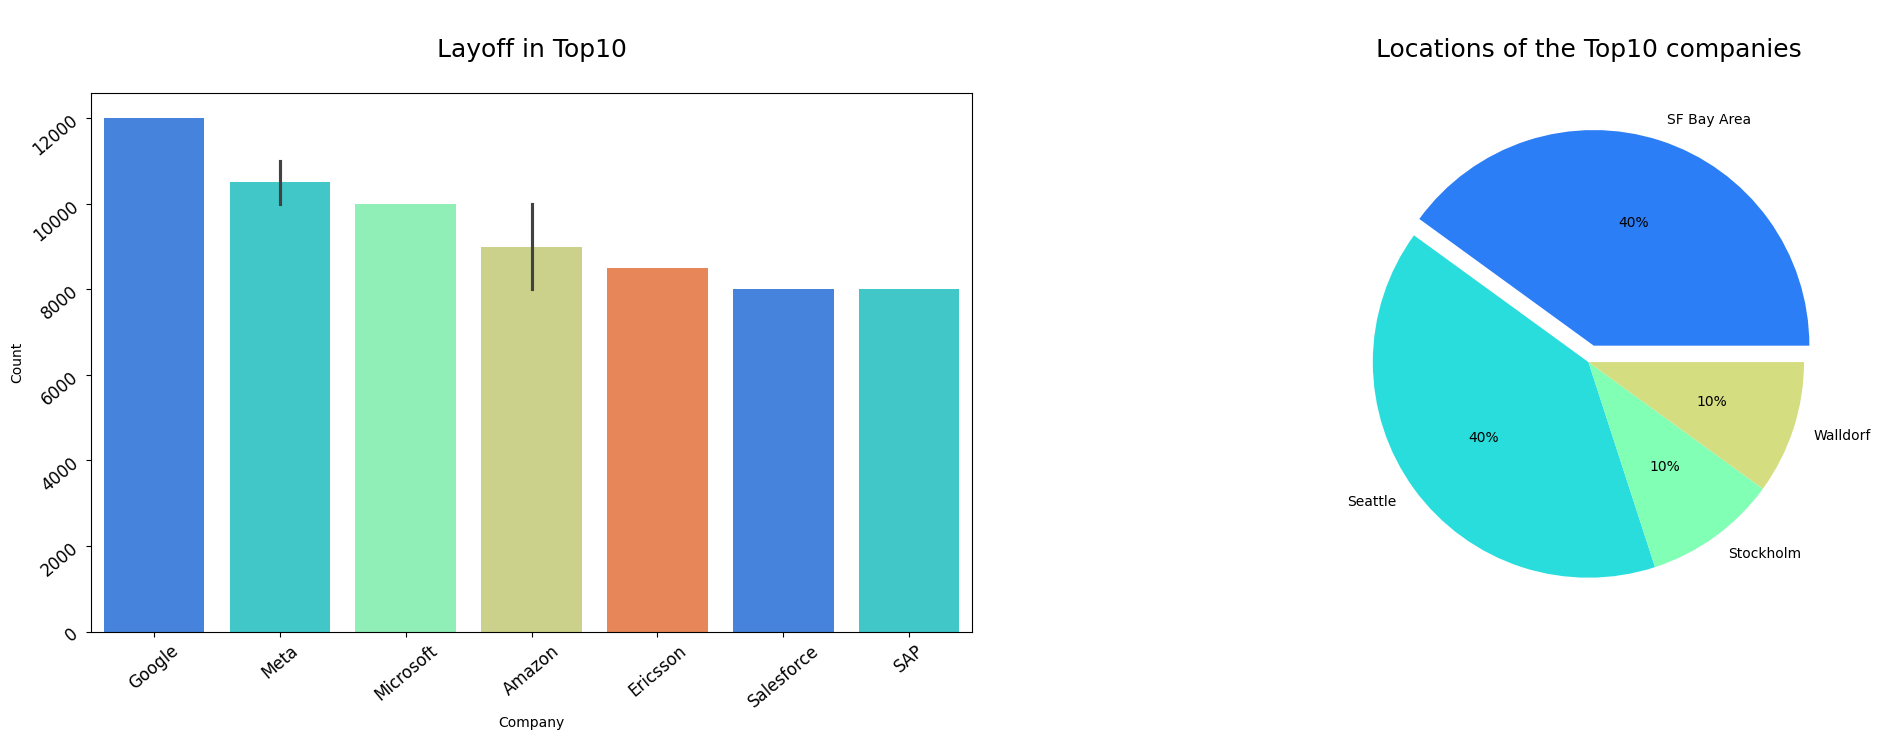

In [26]:
plt.figure(figsize=(25,7))

plt.subplot(1, 2, 1)
sns.barplot(data=top10_comp, x=top10_comp['Company'], y=top10_comp['Laid_Off_Count'], palette=palette)
plt.xlabel('Company'), plt.ylabel('Count')
plt.xticks(rotation=40, fontsize=12), plt.yticks(rotation=40, fontsize=12)
plt.title("\nLayoff in Top10\n", fontsize=18)

plt.subplot(1, 2, 2)
top10_comp_loca = top10_comp['Location_HQ'].value_counts()
plt.pie(data=top10_comp, x=top10_comp_loca.values, labels=top10_comp_loca.index, autopct='%.f%%',  explode = [0.08, 0, 0, 0], colors=palette)
plt.title("\nLocations of the Top10 companies\n", fontsize=18)

plt.show()

<a id="v5"></a>
<h5 style="background-color:#efefef; margin-bottom:0px;padding:10px; color:#000">6.6.2b Visualize the Top10 Companies <strong>Location</strong></h5>

In [27]:
for i in range(len(top10_comp['Location_HQ'])):
    def find_lat(i):
        return geolocator.geocode(i).latitude
    
    def find_long(i):
        return geolocator.geocode(i).longitude

In [28]:
top10_comp['latitude'] = top10_comp['Location_HQ'].apply(find_lat)
top10_comp['longitude'] = top10_comp['Location_HQ'].apply(find_long)

In [29]:
top10_comp = top10_comp.fillna(0)

In [30]:
top10_comp.head()

,Company,Location_HQ,Industry,Percentage,Date,Funds_Raised,Stage,Country,Laid_Off_Count,year_of_laidOff,latitude,longitude
1386,Google,SF Bay Area,Consumer,0.06,2023-01-20,26.0,Post-IPO,United States,12000.0,2023,37.788497,-122.355847
1870,Meta,SF Bay Area,Consumer,0.13,2022-11-09,26000.0,Post-IPO,United States,11000.0,2022,37.788497,-122.355847
1419,Microsoft,Seattle,Other,0.05,2023-01-18,1.0,Post-IPO,United States,10000.0,2023,47.603832,-122.330062
1061,Meta,SF Bay Area,Consumer,0.00,2023-03-14,26000.0,Post-IPO,United States,10000.0,2023,37.788497,-122.355847
1802,Amazon,Seattle,Retail,0.03,2022-11-16,108.0,Post-IPO,United States,10000.0,2022,47.603832,-122.330062


In [31]:
top10_comp_fig = px.scatter_mapbox(top10_comp,lat='latitude',lon='longitude', hover_name='Location_HQ', hover_data=['Laid_Off_Count', "Company"], 
    color='Laid_Off_Count',color_continuous_scale=px.colors.sequential.Cividis,
    size="Laid_Off_Count", size_max=50, opacity=0.4,
    center={'lat':10, 'lon':30},
    zoom=1,
    height=400,width=1400,
    mapbox_style="carto-positron")
top10_comp_fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
top10_comp_fig.update_layout(title_text="Population of each cities")
top10_comp_fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

<a id="v6"></a>
<h5 style="background-color:#efefef; margin-bottom:0px;padding:10px; color:#000">6.6.2c Visualize the Top10 Layoff Companies <strong>Funds Raised</strong></h5>

In [ ]:
plt.figure(figsize=(25,7))

sns.barplot(data=top10_comp, y=top10_comp['Company'], x=top10_comp['Funds_Raised'].astype(str).astype(float), palette=palette)
plt.ylabel('Company'), plt.xlabel('Fund Raised')
plt.xticks(rotation=40, fontsize=12), plt.yticks(rotation=40, fontsize=12)
plt.title("\nFund Raised in Top10\n", fontsize=18)

plt.show()

<br><br><br>
<a id="conclusion"></a>
<div style="background:#4AD3FF; color:#000; padding: 20px; text-align:center">Thankyou! For viewing this Notebook, do upvote if you liked it. Please feel free to provide any feedback!… 😄</div>